### Data cleaning

In [35]:
# Import library yang di butuhkan
import pandas as pd
from sklearn.impute import SimpleImputer

In [36]:
#Import dataset
dataset_game= pd.read_csv("vgsales.csv")
dataset_game.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [37]:
dataset_clean = dataset_game.copy()#copy dataset

In [38]:
dataset_clean.info() #cek data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16600 entries, 0 to 16599
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16600 non-null  int64  
 1   Name          16600 non-null  object 
 2   Platform      16600 non-null  object 
 3   Year          16329 non-null  float64
 4   Genre         16600 non-null  object 
 5   Publisher     16542 non-null  object 
 6   NA_Sales      16600 non-null  float64
 7   EU_Sales      16600 non-null  float64
 8   JP_Sales      16600 non-null  float64
 9   Other_Sales   16600 non-null  float64
 10  Global_Sales  16600 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [39]:
dataset_clean.isna().sum() #Mengecek data yang kosong

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [40]:
#Deklarasi kelas SimpleImputer dan lakukan transformasi pada kolom yang ingin diubah
imputer_mean= SimpleImputer (strategy='mean')
imputer_median= SimpleImputer (strategy='median')
imputer_modus= SimpleImputer (strategy='most_frequent')

In [41]:
#menghapus data yang kosong
dataset_clean['Year'] = imputer_mean.fit_transform(dataset_clean[['Year']]) 
dataset_clean['Publisher'] = imputer_modus.fit_transform(dataset_clean[['Publisher']])

In [42]:
dataset_clean.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

### KMeans

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [44]:
model = KMeans(n_clusters=3)#Buat objek dari k means dengan jumlah cluster : 3

In [45]:
points = dataset_clean[['Year','EU_Sales']]# Pilih atribut yang akan dilatih


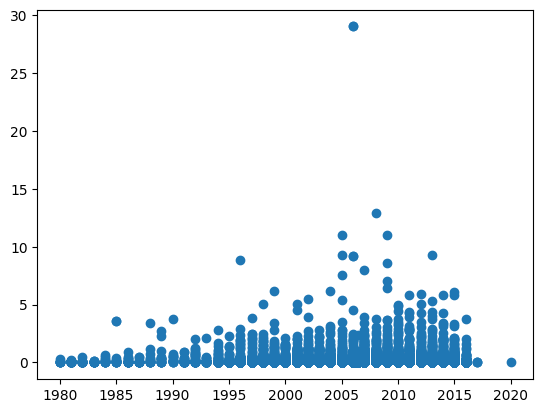

In [46]:
plt.scatter(points['Year'],points['EU_Sales'])# Melihat visualisasi 

In [47]:
model.fit(points)# Lakukan fit terhadap model

KMeans(n_clusters=3)

In [48]:
labels = model.labels_# Tentukan label untuk cluster

print(labels)

[2 1 0 ... 2 2 1]


In [53]:
dfKmeans = pd.DataFrame({'labels': labels, 'Year': dataset_clean.Year}) # Buat dataframe dengan label dan spesies sebagai kolom



In [56]:
crosstab = pd.crosstab(dfKmeans["labels"],dfKmeans["Year"]) # buat crosstab
crosstab

Year,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2020.0
labels,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,1431,1259,1139,657,546,582,614,344,3,1
1,9,46,36,17,14,15,21,16,15,17,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
centroid = model.cluster_centers_# Menampung koordinat dari tiap centroid
centroid

array([[2.01091167e+03, 1.51781609e-01],
       [1.99593890e+03, 1.59380379e-01],
       [2.00453217e+03, 1.40540497e-01]])

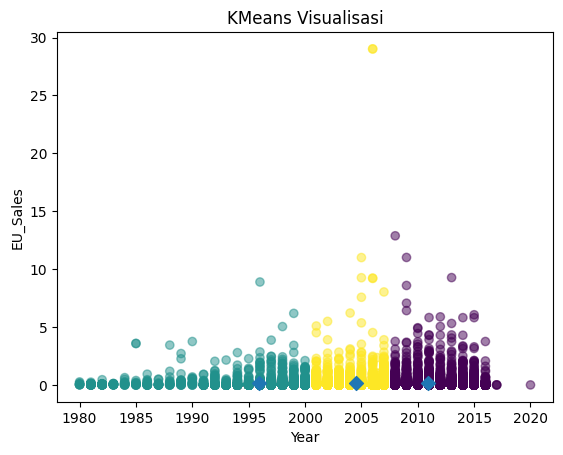

In [62]:
# visualisasi cluster
plt.scatter(points['Year'], points['EU_Sales'], alpha=.5, c=labels)
plt.scatter(centroid[:,0], centroid[:,1], marker='D', s=50)
plt.title('KMeans Visualisasi')
plt.xlabel('Year')
plt.ylabel('EU_Sales')
plt.show()

### Elbow

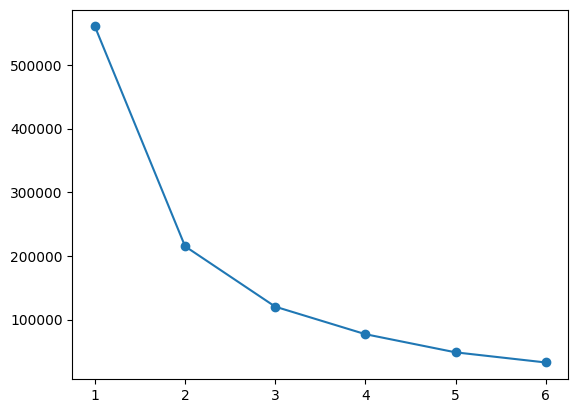

In [64]:
#Visualisasi Elbow
cluster_sum = range(1,7)
inertia = []

for cluster in cluster_sum:
    model = KMeans(n_clusters=cluster)
    model.fit(points)
    inertia.append(model.inertia_)

plt.plot(cluster_sum, inertia, '-o')
plt.xticks(cluster_sum)
plt.show()